The first algorithm of more general use for corner detection was developed by Harris and Stephens in 1988. The original article, entitled “A Combined Corner and Edge Detector”, can be found at http://www.bmva.org/bmvc/1988/avc-88-023.pdf . Six years later in 1994, researchers Shi and Tomasi, through the article “Good Features To Track”, improved the method. This article can be found at http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf.


Shi-Tomasi Corner Detector

Shi-Tomasi is almost similar to Harris Corner detector, apart from the way the score (R) is calculated. This gives a better result. Moreover, in this method, we can find the top N corners, which might be useful in case we don’t want to detect each and every corner.

So under Shi_Tomasi’s we just replace the Harris function that defines a “corner”

![Imgur](https://imgur.com/Gn2KGxg.png)


If R is greater than a threshold, its classified as a corner.


Shi-Tomasi uses the smallest of the two eigenvalues. If the smallest of the two eigenvalues is large, then there's something more complex than an edge going on in the local neighborhood.

The Harris corner detector also uses the Structure tensor, but it combines the determinant and trace obtain a similar result with less computational cost. Shi-Tomasi is better but more expensive to compute because the eigenvalue computation requires the computation of square roots. The Harris detector is an approximation to the Shi-Tomasi detector.

![Imgur](https://imgur.com/gaVA3Vz.png)

* only when λ1 and λ2 are above a minimum value, λmin, it is considered as a corner(green region)
* when either λ1 or λ2 are below a minimum value, λmin, it is considered as a edge(orange region)
* when both λ1 and λ2 are below a minimum value, λmin, it is considered as a flat region(grey region)

---


OpenCV has implemented this Shi-Tomasi algorithm with a function named `goodFeaturesToTrack()`. 

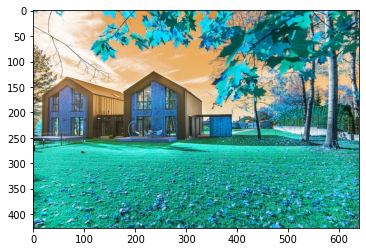

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

my_image = cv2.imread('house.jpg')

plt.imshow(my_image)


### goodFeaturesToTrack() works only on grayscale?

From the documentation of goodFeaturesToTrack(), the image parameters takes in a 8-bit or 32-bit single channel image. single channel implies grayscale.

So yes, the function only works for grayscale images.

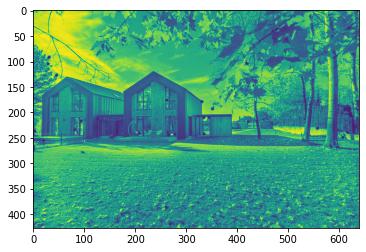

In [10]:
gray_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)

### [Parameters](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#goodfeaturestotrack)

* image – Input 8-bit or floating-point 32-bit, single-channel image.
* eig_image – The parameter is ignored.
* temp_image – The parameter is ignored.
* corners – Output vector of detected corners.
* maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
* qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see cornerMinEigenVal() ) or the Harris function response (see cornerHarris() ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.
* minDistance – Minimum possible Euclidean distance between the returned corners. It will allow you to NOT having corner that are too close together.
* mask – Optional region of interest. If the image is not empty (it needs to have the type CV_8UC1 and the same size as image ), it specifies the region in which the corners are detected.
* blockSize – Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. See cornerEigenValsAndVecs() .
* useHarrisDetector – Parameter indicating whether to use a Harris detector (see cornerHarris()) or cornerMinEigenVal().
* k – Free parameter of the Harris detector.



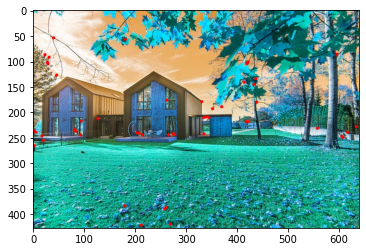

(<matplotlib.image.AxesImage at 0x7ff85c41be50>, None)

In [11]:
#input image, #points, quality level (0-1), min euclidean dist. between detected points
corners = cv2.goodFeaturesToTrack(gray_image,25,0.01,10)

corners = np.int0(corners)  #np.int0 is int64


""" The above variable corners is a multi-dimensional Numpy array and it denotes all the locations of the corners present in the gray scale image. """

for i in corners:
    x,y = i.ravel() # Ravel Returns a contiguous flattened array.
    cv2.circle(my_image,(x,y),3,255,-1) #Draws circle (Img, center, radius, color, etc.)

plt.imshow(my_image),plt.show()

### Limitations

Both Shi-Tomasi and Harris Corner work well for most of the cases but when the scale of the image changes both of these algorithms doesn’t give satisfactory results. So, in the next blog, we will discuss one of the famous algorithms for finding scale-invariant features known as SIFT (Scale-Invariant Feature Transform).